In [235]:
import numpy as np
import numpy

In [236]:
def gen_var_combo(num_dim, latent_dim):
    '''
    generates a combination of the latent variables that each function depends on. 
    0 represents the identity.
    
    '''
    vars_ = list(range(latent_dim))
    p = np.full(latent_dim, ((1/(latent_dim))))
    #p[0] = .5
    var_combo = np.random.choice(vars_, size = (num_dim, latent_dim), p = p)
    return var_combo

In [237]:
def gen_func_combo(num_dim, latent_dim):
    '''
    generates a random function dependant on latent dimesnions for each dimnesion
    
    '''
    funcs = ['+', '-', '*', '/']
    func_combo = np.random.choice(funcs, size = (num_dim, latent_dim-1))
    return func_combo

In [238]:
def gen_latent_space(a, num_samples, num_dim, num_latent_dim):
    '''
    Generates a num_samples by num_dimensions matrix where each dimension is a function
    of the latent dimensions.
    
    '''
    latent_samples = np.random.uniform(high = a, size = (num_samples, num_latent_dim))
    
    var_combo, func_combo, weights = gen_space_params(num_dim, num_latent_dim)

    super_sample = []
    for sample in range(num_samples):
        dimension =[]
        for dim in range(num_dim):
            weight = np.multiply(latent_samples[sample, :], weights[dim])
            dem = weight[var_combo[dim, 0]]
            for lat in range(num_latent_dim-1):
                if(func_combo[dim, lat] == '+'):
                    dem = dem + weight[int(var_combo[dim, lat])]
                elif(func_combo[dim, lat] == '-'):
                    dem = dem + weight[int(var_combo[dim, lat])]
                elif (func_combo[dim, lat] == '*'):
                    dem = dem * weight[int(var_combo[dim, lat])]
                elif (func_combo[dim, lat] == '/'):
                    dem = dem * weight[int(var_combo[dim, lat])]
            dimension.append(dem)
        #print(dimension)
        #dimension = np.concatenate(dimension)
        super_sample.append(dimension)
    return numpy.array(super_sample), latent_samples

In [239]:
def gen_space_params(num_dim, num_latent_dim):
    '''
    gets the parameters used to construct latent space
    
    '''
    var_combo = gen_var_combo(num_dim, num_latent_dim)
    func_combo = gen_func_combo(num_dim, num_latent_dim)
    weights = np.random.rand(num_dim, num_latent_dim)
    return var_combo, func_combo, weights

In [240]:
samp, lat =gen_latent_space(10, 6000, 30, 2)

In [241]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 3  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
input_dim = 30
# this is our input placeholder
input_img = Input(shape=(30,))
# "encoded" is the encoded representation of the input
x = Dense(input_dim)(input_img)
x = Dense(input_dim)(input_img)
encoded = Dense(encoding_dim, activation='relu')(x)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(30, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [242]:
encoder = Model(input_img, encoded)

In [243]:
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [244]:
autoencoder.compile(optimizer='sgd', loss='mean_squared_error')

In [245]:
samp.shape

(6000, 30)

In [246]:
samp.max(axis = 0).shape

(30,)

In [247]:
x_train = samp[:5000, :]/samp[:5000, :].max(axis = 0)
x_test = samp[5000:, :]/samp[:5000, :].max(axis = 0)

In [248]:
autoencoder.fit(x_train, x_train,
                epochs=5000,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 5000 samples, validate on 1000 samples
Epoch 1/5000
5000/5000 [==============================] - 0s 50us/step - loss: 0.1000 - val_loss: 0.0991
Epoch 2/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0999 - val_loss: 0.0990
Epoch 3/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0998 - val_loss: 0.0989
Epoch 4/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0997 - val_loss: 0.0988
Epoch 5/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0996 - val_loss: 0.0988
Epoch 6/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0996 - val_loss: 0.0987
Epoch 7/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0995 - val_loss: 0.0986
Epoch 8/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0994 - val_loss: 0.0986
Epoch 9/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0994 - val_loss: 0.0985
Epoch 1

Epoch 78/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0968 - val_loss: 0.0959
Epoch 79/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0967 - val_loss: 0.0959
Epoch 80/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0967 - val_loss: 0.0959
Epoch 81/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0967 - val_loss: 0.0958
Epoch 82/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0966 - val_loss: 0.0958
Epoch 83/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0966 - val_loss: 0.0958
Epoch 84/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0966 - val_loss: 0.0957
Epoch 85/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0965 - val_loss: 0.0957
Epoch 86/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0965 - val_loss: 0.0957
Epoch 87/5000
5000/5000 [=====================

Epoch 155/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0939 - val_loss: 0.0931
Epoch 156/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0939 - val_loss: 0.0931
Epoch 157/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0938 - val_loss: 0.0930
Epoch 158/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0938 - val_loss: 0.0930
Epoch 159/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0938 - val_loss: 0.0930
Epoch 160/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0937 - val_loss: 0.0929
Epoch 161/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0937 - val_loss: 0.0929
Epoch 162/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0936 - val_loss: 0.0928
Epoch 163/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0936 - val_loss: 0.0928
Epoch 164/5000
5000/5000 [===========

5000/5000 [==============================] - 0s 12us/step - loss: 0.0906 - val_loss: 0.0898
Epoch 232/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0905 - val_loss: 0.0897
Epoch 233/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0905 - val_loss: 0.0897
Epoch 234/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0904 - val_loss: 0.0896
Epoch 235/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0904 - val_loss: 0.0896
Epoch 236/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0903 - val_loss: 0.0895
Epoch 237/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0903 - val_loss: 0.0895
Epoch 238/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0902 - val_loss: 0.0894
Epoch 239/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0902 - val_loss: 0.0894
Epoch 240/5000
5000/5000 [==========================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0862 - val_loss: 0.0855
Epoch 308/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0862 - val_loss: 0.0855
Epoch 309/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0861 - val_loss: 0.0854
Epoch 310/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0861 - val_loss: 0.0853
Epoch 311/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0860 - val_loss: 0.0853
Epoch 312/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0859 - val_loss: 0.0852
Epoch 313/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0859 - val_loss: 0.0852
Epoch 314/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0858 - val_loss: 0.0851
Epoch 315/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0857 - val_loss: 0.0850
Epoch 316/5000
5000/5000 [==========================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0806 - val_loss: 0.0800
Epoch 384/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0805 - val_loss: 0.0799
Epoch 385/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0804 - val_loss: 0.0798
Epoch 386/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0803 - val_loss: 0.0797
Epoch 387/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0802 - val_loss: 0.0796
Epoch 388/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0802 - val_loss: 0.0795
Epoch 389/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0801 - val_loss: 0.0794
Epoch 390/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0800 - val_loss: 0.0794
Epoch 391/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0799 - val_loss: 0.0793
Epoch 392/5000
5000/5000 [==========================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0733 - val_loss: 0.0728
Epoch 460/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0732 - val_loss: 0.0727
Epoch 461/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0731 - val_loss: 0.0726
Epoch 462/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0730 - val_loss: 0.0725
Epoch 463/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0729 - val_loss: 0.0724
Epoch 464/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0728 - val_loss: 0.0723
Epoch 465/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0727 - val_loss: 0.0722
Epoch 466/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0726 - val_loss: 0.0720
Epoch 467/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0724 - val_loss: 0.0719
Epoch 468/5000
5000/5000 [==========================

5000/5000 [==============================] - 0s 12us/step - loss: 0.0646 - val_loss: 0.0642
Epoch 536/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0645 - val_loss: 0.0641
Epoch 537/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0643 - val_loss: 0.0640
Epoch 538/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0642 - val_loss: 0.0638
Epoch 539/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0641 - val_loss: 0.0637
Epoch 540/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0640 - val_loss: 0.0636
Epoch 541/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0639 - val_loss: 0.0635
Epoch 542/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0637 - val_loss: 0.0634
Epoch 543/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0636 - val_loss: 0.0632
Epoch 544/5000
5000/5000 [==========================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0552 - val_loss: 0.0550
Epoch 612/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0551 - val_loss: 0.0548
Epoch 613/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0550 - val_loss: 0.0547
Epoch 614/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0548 - val_loss: 0.0546
Epoch 615/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0547 - val_loss: 0.0545
Epoch 616/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0546 - val_loss: 0.0544
Epoch 617/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0545 - val_loss: 0.0542
Epoch 618/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0543 - val_loss: 0.0541
Epoch 619/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0542 - val_loss: 0.0540
Epoch 620/5000
5000/5000 [==========================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0464 - val_loss: 0.0463
Epoch 688/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0462 - val_loss: 0.0462
Epoch 689/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0461 - val_loss: 0.0461
Epoch 690/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0460 - val_loss: 0.0459
Epoch 691/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0459 - val_loss: 0.0458
Epoch 692/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0458 - val_loss: 0.0457
Epoch 693/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0457 - val_loss: 0.0456
Epoch 694/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0456 - val_loss: 0.0455
Epoch 695/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0455 - val_loss: 0.0454
Epoch 696/5000
5000/5000 [==========================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0392 - val_loss: 0.0393
Epoch 764/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0391 - val_loss: 0.0392
Epoch 765/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0391 - val_loss: 0.0391
Epoch 766/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0390 - val_loss: 0.0390
Epoch 767/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0389 - val_loss: 0.0389
Epoch 768/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0388 - val_loss: 0.0389
Epoch 769/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0387 - val_loss: 0.0388
Epoch 770/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0387 - val_loss: 0.0387
Epoch 771/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0386 - val_loss: 0.0386
Epoch 772/5000
5000/5000 [==========================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0342 - val_loss: 0.0343
Epoch 840/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0342 - val_loss: 0.0343
Epoch 841/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0341 - val_loss: 0.0342
Epoch 842/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0340 - val_loss: 0.0342
Epoch 843/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0340 - val_loss: 0.0341
Epoch 844/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0339 - val_loss: 0.0341
Epoch 845/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0339 - val_loss: 0.0340
Epoch 846/5000
5000/5000 [==============================] - ETA: 0s - loss: 0.033 - 0s 13us/step - loss: 0.0338 - val_loss: 0.0340
Epoch 847/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0338 - val_loss: 0.0339
Epoch 848/5000
5000/5000 [==

5000/5000 [==============================] - 0s 13us/step - loss: 0.0309 - val_loss: 0.0311
Epoch 916/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0309 - val_loss: 0.0311
Epoch 917/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0309 - val_loss: 0.0310
Epoch 918/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0308 - val_loss: 0.0310
Epoch 919/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0308 - val_loss: 0.0310
Epoch 920/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0308 - val_loss: 0.0309
Epoch 921/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0307 - val_loss: 0.0309
Epoch 922/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0307 - val_loss: 0.0309
Epoch 923/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0307 - val_loss: 0.0308
Epoch 924/5000
5000/5000 [==========================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0288 - val_loss: 0.0290
Epoch 992/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0288 - val_loss: 0.0290
Epoch 993/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0288 - val_loss: 0.0289
Epoch 994/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0287 - val_loss: 0.0289
Epoch 995/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0287 - val_loss: 0.0289
Epoch 996/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0287 - val_loss: 0.0289
Epoch 997/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0287 - val_loss: 0.0288
Epoch 998/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0286 - val_loss: 0.0288
Epoch 999/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0286 - val_loss: 0.0288
Epoch 1000/5000
5000/5000 [=========================

Epoch 1067/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0273 - val_loss: 0.0275
Epoch 1068/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0273 - val_loss: 0.0275
Epoch 1069/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0273 - val_loss: 0.0275
Epoch 1070/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0273 - val_loss: 0.0274
Epoch 1071/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0273 - val_loss: 0.0274
Epoch 1072/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0272 - val_loss: 0.0274
Epoch 1073/5000
5000/5000 [==============================] - ETA: 0s - loss: 0.027 - 0s 12us/step - loss: 0.0272 - val_loss: 0.0274
Epoch 1074/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0272 - val_loss: 0.0274
Epoch 1075/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0272 - val_loss: 0.0274
Epoc

5000/5000 [==============================] - 0s 13us/step - loss: 0.0262 - val_loss: 0.0264
Epoch 1143/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0262 - val_loss: 0.0264
Epoch 1144/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0262 - val_loss: 0.0264
Epoch 1145/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0262 - val_loss: 0.0263
Epoch 1146/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0262 - val_loss: 0.0263
Epoch 1147/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0262 - val_loss: 0.0263
Epoch 1148/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0261 - val_loss: 0.0263
Epoch 1149/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0261 - val_loss: 0.0263
Epoch 1150/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0261 - val_loss: 0.0263
Epoch 1151/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 14us/step - loss: 0.0253 - val_loss: 0.0254
Epoch 1219/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0253 - val_loss: 0.0254
Epoch 1220/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0253 - val_loss: 0.0254
Epoch 1221/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0253 - val_loss: 0.0254
Epoch 1222/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0253 - val_loss: 0.0254
Epoch 1223/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0252 - val_loss: 0.0254
Epoch 1224/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0252 - val_loss: 0.0254
Epoch 1225/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0252 - val_loss: 0.0254
Epoch 1226/5000
5000/5000 [==============================] - ETA: 0s - loss: 0.025 - 0s 13us/step - loss: 0.0252 - val_loss: 0.0253
Epoch 1227/5000
5000

5000/5000 [==============================] - 0s 13us/step - loss: 0.0245 - val_loss: 0.0246
Epoch 1294/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0245 - val_loss: 0.0246
Epoch 1295/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0245 - val_loss: 0.0246
Epoch 1296/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0245 - val_loss: 0.0246
Epoch 1297/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0244 - val_loss: 0.0246
Epoch 1298/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0244 - val_loss: 0.0246
Epoch 1299/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0244 - val_loss: 0.0245
Epoch 1300/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0244 - val_loss: 0.0245
Epoch 1301/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0244 - val_loss: 0.0245
Epoch 1302/5000
5000/5000 [=================

Epoch 1369/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0237 - val_loss: 0.0238
Epoch 1370/5000
5000/5000 [==============================] - 0s 15us/step - loss: 0.0237 - val_loss: 0.0238
Epoch 1371/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0237 - val_loss: 0.0238
Epoch 1372/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0237 - val_loss: 0.0238
Epoch 1373/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0237 - val_loss: 0.0238
Epoch 1374/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0237 - val_loss: 0.0238
Epoch 1375/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0236 - val_loss: 0.0237
Epoch 1376/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0236 - val_loss: 0.0237
Epoch 1377/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0236 - val_loss: 0.0237
Epoch 1378/5000
5000/5000 [=

Epoch 1444/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0229 - val_loss: 0.0230
Epoch 1445/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0229 - val_loss: 0.0230
Epoch 1446/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0229 - val_loss: 0.0230
Epoch 1447/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0229 - val_loss: 0.0230
Epoch 1448/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0229 - val_loss: 0.0230
Epoch 1449/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0229 - val_loss: 0.0230
Epoch 1450/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0229 - val_loss: 0.0230
Epoch 1451/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0229 - val_loss: 0.0229
Epoch 1452/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0229 - val_loss: 0.0229
Epoch 1453/5000
5000/5000 [=

5000/5000 [==============================] - 0s 13us/step - loss: 0.0222 - val_loss: 0.0222
Epoch 1520/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0222 - val_loss: 0.0222
Epoch 1521/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0221 - val_loss: 0.0222
Epoch 1522/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0221 - val_loss: 0.0222
Epoch 1523/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0221 - val_loss: 0.0222
Epoch 1524/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0221 - val_loss: 0.0222
Epoch 1525/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0221 - val_loss: 0.0222
Epoch 1526/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0221 - val_loss: 0.0221
Epoch 1527/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0221 - val_loss: 0.0221
Epoch 1528/5000
5000/5000 [=================

Epoch 1595/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0213 - val_loss: 0.0214
Epoch 1596/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0213 - val_loss: 0.0214
Epoch 1597/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0213 - val_loss: 0.0214
Epoch 1598/5000
5000/5000 [==============================] - ETA: 0s - loss: 0.020 - 0s 12us/step - loss: 0.0213 - val_loss: 0.0214
Epoch 1599/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0213 - val_loss: 0.0213
Epoch 1600/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0213 - val_loss: 0.0213
Epoch 1601/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0213 - val_loss: 0.0213
Epoch 1602/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0213 - val_loss: 0.0213
Epoch 1603/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0213 - val_loss: 0.0213
Epoc

5000/5000 [==============================] - 0s 13us/step - loss: 0.0205 - val_loss: 0.0205
Epoch 1670/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0205 - val_loss: 0.0205
Epoch 1671/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0205 - val_loss: 0.0205
Epoch 1672/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0205 - val_loss: 0.0205
Epoch 1673/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0205 - val_loss: 0.0205
Epoch 1674/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0205 - val_loss: 0.0205
Epoch 1675/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0205 - val_loss: 0.0205
Epoch 1676/5000
5000/5000 [==============================] - 0s 19us/step - loss: 0.0204 - val_loss: 0.0205
Epoch 1677/5000
5000/5000 [==============================] - 0s 21us/step - loss: 0.0204 - val_loss: 0.0204
Epoch 1678/5000
5000/5000 [=================

Epoch 1745/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0196 - val_loss: 0.0196
Epoch 1746/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0196 - val_loss: 0.0196
Epoch 1747/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0196 - val_loss: 0.0196
Epoch 1748/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0196 - val_loss: 0.0196
Epoch 1749/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0196 - val_loss: 0.0196
Epoch 1750/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0196 - val_loss: 0.0196
Epoch 1751/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0196 - val_loss: 0.0196
Epoch 1752/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0196 - val_loss: 0.0196
Epoch 1753/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0195 - val_loss: 0.0195
Epoch 1754/5000
5000/5000 [=

5000/5000 [==============================] - 0s 13us/step - loss: 0.0187 - val_loss: 0.0187
Epoch 1821/5000
5000/5000 [==============================] - 0s 11us/step - loss: 0.0187 - val_loss: 0.0187
Epoch 1822/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0187 - val_loss: 0.0187
Epoch 1823/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0187 - val_loss: 0.0187
Epoch 1824/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0187 - val_loss: 0.0187
Epoch 1825/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0187 - val_loss: 0.0186
Epoch 1826/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0187 - val_loss: 0.0186
Epoch 1827/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0186 - val_loss: 0.0186
Epoch 1828/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0186 - val_loss: 0.0186
Epoch 1829/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0178 - val_loss: 0.0177
Epoch 1897/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0178 - val_loss: 0.0177
Epoch 1898/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0178 - val_loss: 0.0177
Epoch 1899/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0178 - val_loss: 0.0177
Epoch 1900/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0177 - val_loss: 0.0177
Epoch 1901/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0177 - val_loss: 0.0177
Epoch 1902/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0177 - val_loss: 0.0177
Epoch 1903/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0177 - val_loss: 0.0177
Epoch 1904/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0177 - val_loss: 0.0176
Epoch 1905/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0168 - val_loss: 0.0168
Epoch 1973/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0168 - val_loss: 0.0167
Epoch 1974/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0168 - val_loss: 0.0167
Epoch 1975/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0168 - val_loss: 0.0167
Epoch 1976/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0168 - val_loss: 0.0167
Epoch 1977/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0168 - val_loss: 0.0167
Epoch 1978/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0168 - val_loss: 0.0167
Epoch 1979/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0167 - val_loss: 0.0167
Epoch 1980/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0167 - val_loss: 0.0167
Epoch 1981/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0159 - val_loss: 0.0158
Epoch 2049/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0158 - val_loss: 0.0158
Epoch 2050/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0158 - val_loss: 0.0158
Epoch 2051/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0158 - val_loss: 0.0157
Epoch 2052/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0158 - val_loss: 0.0157
Epoch 2053/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0158 - val_loss: 0.0157
Epoch 2054/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0158 - val_loss: 0.0157
Epoch 2055/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0158 - val_loss: 0.0157
Epoch 2056/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0158 - val_loss: 0.0157
Epoch 2057/5000
5000/5000 [=================

Epoch 2124/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0149 - val_loss: 0.0148
Epoch 2125/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0149 - val_loss: 0.0148
Epoch 2126/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0149 - val_loss: 0.0148
Epoch 2127/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0148 - val_loss: 0.0148
Epoch 2128/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0148 - val_loss: 0.0148
Epoch 2129/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0148 - val_loss: 0.0147
Epoch 2130/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0148 - val_loss: 0.0147
Epoch 2131/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0148 - val_loss: 0.0147
Epoch 2132/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0148 - val_loss: 0.0147
Epoch 2133/5000
5000/5000 [=

Epoch 2200/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0139 - val_loss: 0.0138
Epoch 2201/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0139 - val_loss: 0.0138
Epoch 2202/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0139 - val_loss: 0.0138
Epoch 2203/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0139 - val_loss: 0.0138
Epoch 2204/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0139 - val_loss: 0.0138
Epoch 2205/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0139 - val_loss: 0.0138
Epoch 2206/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0139 - val_loss: 0.0138
Epoch 2207/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0138 - val_loss: 0.0138
Epoch 2208/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0138 - val_loss: 0.0137
Epoch 2209/5000
5000/5000 [=

Epoch 2276/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0130 - val_loss: 0.0129
Epoch 2277/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0130 - val_loss: 0.0129
Epoch 2278/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0130 - val_loss: 0.0129
Epoch 2279/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0130 - val_loss: 0.0129
Epoch 2280/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0130 - val_loss: 0.0129
Epoch 2281/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0129 - val_loss: 0.0128
Epoch 2282/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0129 - val_loss: 0.0128
Epoch 2283/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0129 - val_loss: 0.0128
Epoch 2284/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0129 - val_loss: 0.0128
Epoch 2285/5000
5000/5000 [=

Epoch 2352/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0121 - val_loss: 0.0120
Epoch 2353/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0121 - val_loss: 0.0120
Epoch 2354/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0121 - val_loss: 0.0120
Epoch 2355/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0121 - val_loss: 0.0120
Epoch 2356/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0120 - val_loss: 0.0120
Epoch 2357/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0120 - val_loss: 0.0119
Epoch 2358/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0120 - val_loss: 0.0119
Epoch 2359/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0120 - val_loss: 0.0119
Epoch 2360/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0120 - val_loss: 0.0119
Epoch 2361/5000
5000/5000 [=

Epoch 2428/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0112 - val_loss: 0.0111
Epoch 2429/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0112 - val_loss: 0.0111
Epoch 2430/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0112 - val_loss: 0.0111
Epoch 2431/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0112 - val_loss: 0.0111
Epoch 2432/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0112 - val_loss: 0.0111
Epoch 2433/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0112 - val_loss: 0.0111
Epoch 2434/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0112 - val_loss: 0.0111
Epoch 2435/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0111 - val_loss: 0.0111
Epoch 2436/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0111 - val_loss: 0.0110
Epoch 2437/5000
5000/5000 [=

Epoch 2504/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0104 - val_loss: 0.0103
Epoch 2505/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0104 - val_loss: 0.0103
Epoch 2506/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0104 - val_loss: 0.0103
Epoch 2507/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0104 - val_loss: 0.0103
Epoch 2508/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0103 - val_loss: 0.0103
Epoch 2509/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0103 - val_loss: 0.0102
Epoch 2510/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0103 - val_loss: 0.0102
Epoch 2511/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0103 - val_loss: 0.0102
Epoch 2512/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0103 - val_loss: 0.0102
Epoch 2513/5000
5000/5000 [=

5000/5000 [==============================] - 0s 13us/step - loss: 0.0096 - val_loss: 0.0095
Epoch 2580/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0096 - val_loss: 0.0095
Epoch 2581/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0096 - val_loss: 0.0095
Epoch 2582/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0096 - val_loss: 0.0095
Epoch 2583/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0096 - val_loss: 0.0095
Epoch 2584/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0095 - val_loss: 0.0095
Epoch 2585/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0095 - val_loss: 0.0095
Epoch 2586/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0095 - val_loss: 0.0094
Epoch 2587/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0095 - val_loss: 0.0094
Epoch 2588/5000
5000/5000 [=================

Epoch 2655/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0088 - val_loss: 0.0088
Epoch 2656/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0088 - val_loss: 0.0088
Epoch 2657/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0088 - val_loss: 0.0087
Epoch 2658/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0088 - val_loss: 0.0087
Epoch 2659/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0088 - val_loss: 0.0087
Epoch 2660/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0088 - val_loss: 0.0087
Epoch 2661/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0088 - val_loss: 0.0087
Epoch 2662/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0088 - val_loss: 0.0087
Epoch 2663/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0088 - val_loss: 0.0087
Epoch 2664/5000
5000/5000 [=

Epoch 2731/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0081 - val_loss: 0.0081
Epoch 2732/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0081 - val_loss: 0.0081
Epoch 2733/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0081 - val_loss: 0.0080
Epoch 2734/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0081 - val_loss: 0.0080
Epoch 2735/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0081 - val_loss: 0.0080
Epoch 2736/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0081 - val_loss: 0.0080
Epoch 2737/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0081 - val_loss: 0.0080
Epoch 2738/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0081 - val_loss: 0.0080
Epoch 2739/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0081 - val_loss: 0.0080
Epoch 2740/5000
5000/5000 [=

Epoch 2807/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0075 - val_loss: 0.0074
Epoch 2808/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0075 - val_loss: 0.0074
Epoch 2809/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0075 - val_loss: 0.0074
Epoch 2810/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0075 - val_loss: 0.0074
Epoch 2811/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0074 - val_loss: 0.0074
Epoch 2812/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0074 - val_loss: 0.0074
Epoch 2813/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0074 - val_loss: 0.0074
Epoch 2814/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0074 - val_loss: 0.0074
Epoch 2815/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0074 - val_loss: 0.0073
Epoch 2816/5000
5000/5000 [=

Epoch 2883/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0069 - val_loss: 0.0068
Epoch 2884/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0069 - val_loss: 0.0068
Epoch 2885/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0069 - val_loss: 0.0068
Epoch 2886/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0068 - val_loss: 0.0068
Epoch 2887/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0068 - val_loss: 0.0068
Epoch 2888/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0068 - val_loss: 0.0068
Epoch 2889/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0068 - val_loss: 0.0068
Epoch 2890/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0068 - val_loss: 0.0067
Epoch 2891/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0068 - val_loss: 0.0067
Epoch 2892/5000
5000/5000 [=

5000/5000 [==============================] - 0s 12us/step - loss: 0.0063 - val_loss: 0.0063
Epoch 2959/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0063 - val_loss: 0.0062
Epoch 2960/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0063 - val_loss: 0.0062
Epoch 2961/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0063 - val_loss: 0.0062
Epoch 2962/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0063 - val_loss: 0.0062
Epoch 2963/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0063 - val_loss: 0.0062
Epoch 2964/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0063 - val_loss: 0.0062
Epoch 2965/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0063 - val_loss: 0.0062
Epoch 2966/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0063 - val_loss: 0.0062
Epoch 2967/5000
5000/5000 [=================

Epoch 3034/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0058 - val_loss: 0.0057
Epoch 3035/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0058 - val_loss: 0.0057
Epoch 3036/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0058 - val_loss: 0.0057
Epoch 3037/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0058 - val_loss: 0.0057
Epoch 3038/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0058 - val_loss: 0.0057
Epoch 3039/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0058 - val_loss: 0.0057
Epoch 3040/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0058 - val_loss: 0.0057
Epoch 3041/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0058 - val_loss: 0.0057
Epoch 3042/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0058 - val_loss: 0.0057
Epoch 3043/5000
5000/5000 [=

Epoch 3110/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0054 - val_loss: 0.0053
Epoch 3111/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0053 - val_loss: 0.0053
Epoch 3112/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0053 - val_loss: 0.0053
Epoch 3113/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0053 - val_loss: 0.0053
Epoch 3114/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0053 - val_loss: 0.0053
Epoch 3115/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0053 - val_loss: 0.0053
Epoch 3116/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0053 - val_loss: 0.0053
Epoch 3117/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0053 - val_loss: 0.0052
Epoch 3118/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0053 - val_loss: 0.0052
Epoch 3119/5000
5000/5000 [=

Epoch 3186/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0049 - val_loss: 0.0049
Epoch 3187/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0049 - val_loss: 0.0049
Epoch 3188/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0049 - val_loss: 0.0049
Epoch 3189/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0049 - val_loss: 0.0049
Epoch 3190/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0049 - val_loss: 0.0049
Epoch 3191/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0049 - val_loss: 0.0048
Epoch 3192/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0049 - val_loss: 0.0048
Epoch 3193/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0049 - val_loss: 0.0048
Epoch 3194/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0049 - val_loss: 0.0048
Epoch 3195/5000
5000/5000 [=

Epoch 3262/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0046 - val_loss: 0.0045
Epoch 3263/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0046 - val_loss: 0.0045
Epoch 3264/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0046 - val_loss: 0.0045
Epoch 3265/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0045 - val_loss: 0.0045
Epoch 3266/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0045 - val_loss: 0.0045
Epoch 3267/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0045 - val_loss: 0.0045
Epoch 3268/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0045 - val_loss: 0.0045
Epoch 3269/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0045 - val_loss: 0.0045
Epoch 3270/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0045 - val_loss: 0.0045
Epoch 3271/5000
5000/5000 [=

Epoch 3338/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0042 - val_loss: 0.0042
Epoch 3339/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0042 - val_loss: 0.0042
Epoch 3340/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0042 - val_loss: 0.0042
Epoch 3341/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0042 - val_loss: 0.0041
Epoch 3342/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0042 - val_loss: 0.0041
Epoch 3343/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0042 - val_loss: 0.0041
Epoch 3344/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0042 - val_loss: 0.0041
Epoch 3345/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0042 - val_loss: 0.0041
Epoch 3346/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0042 - val_loss: 0.0041
Epoch 3347/5000
5000/5000 [=

Epoch 3414/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0039 - val_loss: 0.0039
Epoch 3415/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0039 - val_loss: 0.0039
Epoch 3416/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0039 - val_loss: 0.0039
Epoch 3417/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0039 - val_loss: 0.0038
Epoch 3418/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0039 - val_loss: 0.0038
Epoch 3419/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0039 - val_loss: 0.0038
Epoch 3420/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0039 - val_loss: 0.0038
Epoch 3421/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0039 - val_loss: 0.0038
Epoch 3422/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0039 - val_loss: 0.0038
Epoch 3423/5000
5000/5000 [=

5000/5000 [==============================] - 0s 13us/step - loss: 0.0037 - val_loss: 0.0036
Epoch 3490/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0036
Epoch 3491/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0036
Epoch 3492/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0036
Epoch 3493/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0036
Epoch 3494/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0036
Epoch 3495/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0036
Epoch 3496/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0036
Epoch 3497/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0036 - val_loss: 0.0036
Epoch 3498/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0034 - val_loss: 0.0034
Epoch 3566/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0034 - val_loss: 0.0033
Epoch 3567/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0034 - val_loss: 0.0033
Epoch 3568/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0034 - val_loss: 0.0033
Epoch 3569/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0034 - val_loss: 0.0033
Epoch 3570/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0034 - val_loss: 0.0033
Epoch 3571/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0034 - val_loss: 0.0033
Epoch 3572/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0034 - val_loss: 0.0033
Epoch 3573/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0034 - val_loss: 0.0033
Epoch 3574/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 3642/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 3643/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 3644/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 3645/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 3646/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 3647/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 3648/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 3649/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0032 - val_loss: 0.0031
Epoch 3650/5000
5000/5000 [=================

Epoch 3717/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0030 - val_loss: 0.0029
Epoch 3718/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0030 - val_loss: 0.0029
Epoch 3719/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0030 - val_loss: 0.0029
Epoch 3720/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0030 - val_loss: 0.0029
Epoch 3721/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0030 - val_loss: 0.0029
Epoch 3722/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0030 - val_loss: 0.0029
Epoch 3723/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0030 - val_loss: 0.0029
Epoch 3724/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0030 - val_loss: 0.0029
Epoch 3725/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0030 - val_loss: 0.0029
Epoch 3726/5000
5000/5000 [=

5000/5000 [==============================] - 0s 13us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 3793/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 3794/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 3795/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 3796/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 3797/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 3798/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 3799/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 3800/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 3801/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 3869/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 3870/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 3871/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 3872/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 3873/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 3874/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 3875/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 3876/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 3877/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0025 - val_loss: 0.0025
Epoch 3945/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0025 - val_loss: 0.0025
Epoch 3946/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0025 - val_loss: 0.0025
Epoch 3947/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0025 - val_loss: 0.0025
Epoch 3948/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0025 - val_loss: 0.0025
Epoch 3949/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0025 - val_loss: 0.0025
Epoch 3950/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0025 - val_loss: 0.0025
Epoch 3951/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0025 - val_loss: 0.0025
Epoch 3952/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0025 - val_loss: 0.0025
Epoch 3953/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0024
Epoch 4021/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0024
Epoch 4022/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0024
Epoch 4023/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0023
Epoch 4024/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0023
Epoch 4025/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0023
Epoch 4026/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0023
Epoch 4027/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0023
Epoch 4028/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0023
Epoch 4029/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 0.0022
Epoch 4097/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 0.0022
Epoch 4098/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 0.0022
Epoch 4099/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 0.0022
Epoch 4100/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 0.0022
Epoch 4101/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 0.0022
Epoch 4102/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 0.0022
Epoch 4103/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 0.0022
Epoch 4104/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 0.0022
Epoch 4105/5000
5000/5000 [=================

Epoch 4172/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0022 - val_loss: 0.0021
Epoch 4173/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 0.0021
Epoch 4174/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 0.0021
Epoch 4175/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 0.0021
Epoch 4176/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 0.0021
Epoch 4177/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 0.0021
Epoch 4178/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 0.0021
Epoch 4179/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 0.0021
Epoch 4180/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 0.0021
Epoch 4181/5000
5000/5000 [=

5000/5000 [==============================] - 0s 13us/step - loss: 0.0021 - val_loss: 0.0021
Epoch 4248/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0021 - val_loss: 0.0021
Epoch 4249/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0021 - val_loss: 0.0021
Epoch 4250/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0021 - val_loss: 0.0021
Epoch 4251/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0021 - val_loss: 0.0020
Epoch 4252/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0021 - val_loss: 0.0020
Epoch 4253/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0021 - val_loss: 0.0020
Epoch 4254/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0021 - val_loss: 0.0020
Epoch 4255/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0021 - val_loss: 0.0020
Epoch 4256/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 12us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 4324/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 4325/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 4326/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 4327/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 4328/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 4329/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 4330/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 4331/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 4332/5000
5000/5000 [=================

Epoch 4399/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0020 - val_loss: 0.0019
Epoch 4400/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0020 - val_loss: 0.0019
Epoch 4401/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0020 - val_loss: 0.0019
Epoch 4402/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0020 - val_loss: 0.0019
Epoch 4403/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0019 - val_loss: 0.0019
Epoch 4404/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0019 - val_loss: 0.0019
Epoch 4405/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0019 - val_loss: 0.0019
Epoch 4406/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0019 - val_loss: 0.0019
Epoch 4407/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0019 - val_loss: 0.0019
Epoch 4408/5000
5000/5000 [=

Epoch 4475/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 4476/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 4477/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 4478/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 4479/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 4480/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 4481/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 4482/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 4483/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 4484/5000
5000/5000 [=

Epoch 4551/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 4552/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 4553/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 4554/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 4555/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 4556/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 4557/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 4558/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 4559/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 4560/5000
5000/5000 [=

5000/5000 [==============================] - 0s 13us/step - loss: 0.0018 - val_loss: 0.0017
Epoch 4627/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0018 - val_loss: 0.0017
Epoch 4628/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0018 - val_loss: 0.0017
Epoch 4629/5000
5000/5000 [==============================] - 0s 14us/step - loss: 0.0018 - val_loss: 0.0017
Epoch 4630/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0018 - val_loss: 0.0017
Epoch 4631/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0018 - val_loss: 0.0017
Epoch 4632/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0018 - val_loss: 0.0017
Epoch 4633/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0018 - val_loss: 0.0017
Epoch 4634/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0018 - val_loss: 0.0017
Epoch 4635/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 12us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 4703/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 4704/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 4705/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 4706/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 4707/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 4708/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 4709/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 4710/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 4711/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 12us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 4779/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 4780/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 4781/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 4782/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 4783/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 4784/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 4785/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 4786/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 4787/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 13us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 4855/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 4856/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 4857/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 4858/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 4859/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 4860/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 4861/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 4862/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 4863/5000
5000/5000 [=================

5000/5000 [==============================] - 0s 12us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 4931/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 4932/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 4933/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 4934/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 4935/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 4936/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 4937/5000
5000/5000 [==============================] - 0s 12us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 4938/5000
5000/5000 [==============================] - 0s 13us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 4939/5000
5000/5000 [=================

In [249]:
w = encoder.predict(x_test)

In [250]:
import matplotlib.pyplot as plt

In [251]:
w.shape

(1000, 3)

In [252]:
z = encoder.predict(x_train)

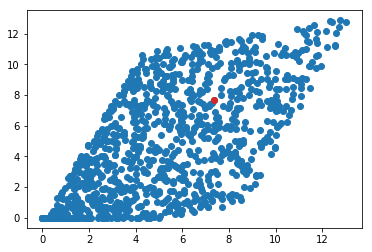

In [253]:
plt.scatter(w[:, 0], w[:, 1])
plt.scatter(w[555, 0], w[555, 1], c = 'C3')

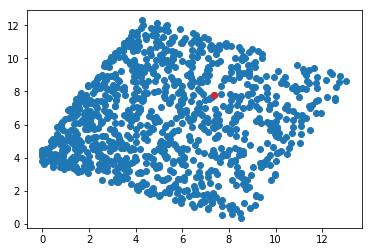

In [265]:
plt.scatter(w[:, 0], w[:, 2])
plt.scatter(w[555, 0], w[555, 2], c = 'C3')

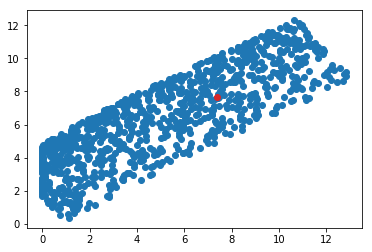

In [266]:
plt.scatter(w[:, 1], w[:, 2])
plt.scatter(w[555, 0], w[555, 1], c = 'C3')

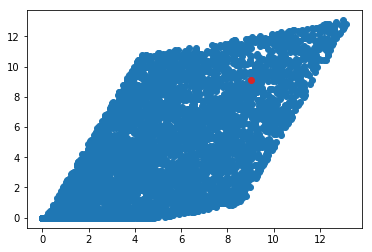

In [255]:
plt.scatter(z[:, 0], z[:, 1])
plt.scatter(z[555, 0], z[555, 1], c = 'C3')

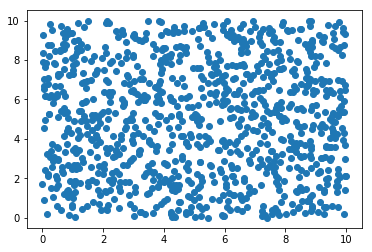

In [256]:
plt.scatter(lat[5000:,0], lat[5000:,1])

In [257]:
from sklearn.decomposition import PCA

In [258]:
pcs = PCA(n_components = 2)

In [259]:
q = pcs.fit_transform(lat)

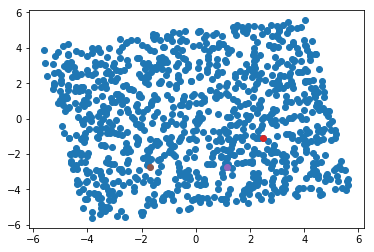

In [260]:
plt.figure()
plt.scatter(q[5000:, 0], q[5000:, 1])
plt.scatter(q[5555, 0], q[5555, 1], c= 'C3' )
plt.scatter(q[5505, 0], q[5505, 1], c= 'C4' )
plt.scatter(q[5005, 0], q[5505, 1], c= 'C5' )

In [261]:
other_pcs = PCA(n_components =2)

In [262]:
ww = other_pcs.fit_transform(w)

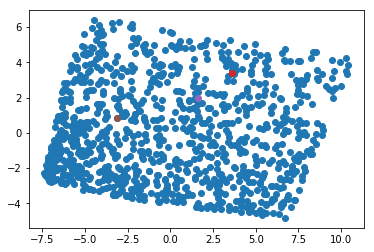

In [264]:
plt.figure()
plt.scatter(ww[:, 0], ww[:, 1])
plt.scatter(ww[555, 0], q[555, 0], c= 'C3' )
plt.scatter(ww[505, 0], q[505, 0], c= 'C4')
plt.scatter(ww[5, 0], ww[5, 1], c= 'C5' )

In [276]:
cols = ['lat1', 'lat2', 'auto1', 'auto2', 'auto3', 'latpc1', 'latpc2', 'auto_pc1', 'auto_pc2']

In [277]:
lat[5000:, :].shape

(1000, 2)

In [278]:
dat = np.concatenate([lat[5000:, :], w, q[5000:, :], ww], axis = 1)

In [279]:
dat.shape

(1000, 9)

In [280]:
import pandas as pd

In [281]:
df = pd.DataFrame(data = dat, columns = cols)

In [282]:
df.head()

,lat1,lat2,auto1,auto2,auto3,latpc1,latpc2,auto_pc1,auto_pc2
0,6.352285,3.738710,4.364440,5.758863,7.905883,1.119465,1.445986,0.931133,-1.777658
1,1.482091,4.628718,3.041694,0.515722,3.618119,-3.527438,-0.261994,-5.710250,0.097535
2,2.856104,6.758839,5.608538,2.386761,3.806766,-1.810103,-2.126421,-3.090336,1.903284
3,0.712581,1.208037,0.386858,0.000000,3.995365,-4.869349,2.977215,-7.053498,-2.216658
4,1.665524,6.039139,4.428974,1.035995,3.219964,-3.106028,-1.620431,-4.910568,1.406820


In [283]:
df['color'] = df['lat1']*df['lat2']

In [287]:
import matplotlib
cmap = matplotlib.cm.get_cmap('viridis')
normalize = matplotlib.colors.Normalize(vmin=min(df.color), vmax=max(df.color))
colors = [cmap(normalize(i)) for i in df.color]

Text(0.5,1,'latent space')

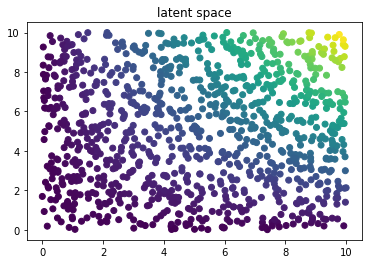

In [298]:
plt.scatter(df.lat1, df.lat2, c =colors)
plt.title('latent space')

Text(0.5,1,'autoencoder output')

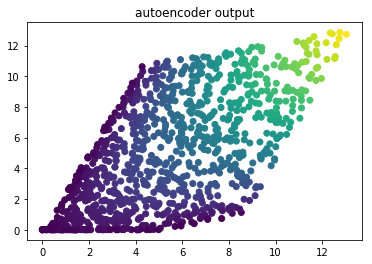

In [299]:
plt.scatter(df.auto1, df.auto2, c =colors)
plt.title('autoencoder output')

Text(0.5,1,'PCA over latent space')

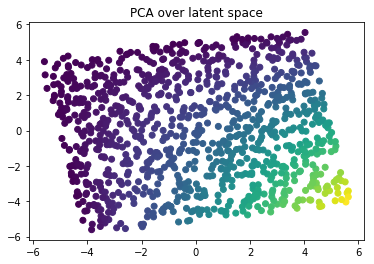

In [300]:
plt.scatter(df.latpc1, df.latpc2, c =colors)
plt.title('PCA over latent space')

Text(0,0.5,'pc2')

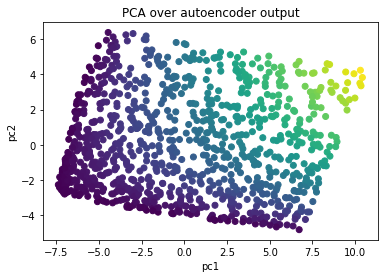

In [301]:
plt.scatter(df.auto_pc1, df.auto_pc2, c =colors)
plt.title('PCA over autoencoder output')
plt.xlabel('pc1')
plt.ylabel('pc2')

In [302]:
pc_over_all = PCA(n_components = 2)

In [303]:
pc_over_samples = pc_over_all.fit_transform(samp[5000:, :])

Text(0,0.5,'pc2')

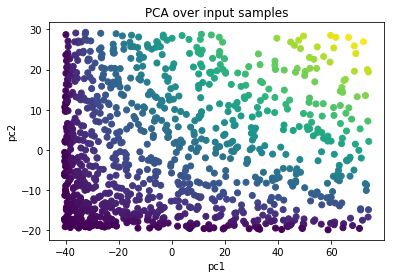

In [305]:
plt.scatter(pc_over_samples[:, 0], pc_over_samples[:, 1], c =colors)
plt.title('PCA over input samples')
plt.xlabel('pc1')
plt.ylabel('pc2')